In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime

%matplotlib inline

In [9]:
!head /mnt/hgfs/shared/gog/fact_daily_revenue_2022.csv

product_type,payment_method,game_genre,transaction_day,currency,revenue
Bundle,Bank Transfer,Adventure,2022-07-08,PLN,190.90390200000002
Bundle,Bank Transfer,Puzzle,2022-07-08,PLN,30.08
Bundle,Bank Transfer,Racing,2022-07-08,PLN,273.400596
DLC,Bank Transfer,Adventure,2022-07-08,PLN,85.79
DLC,Bank Transfer,Indie,2022-07-08,PLN,22.93
DLC,Bank Transfer,Puzzle,2022-07-08,PLN,112.55727499999999
DLC,Bank Transfer,RPG,2022-07-08,PLN,20.090505
DLC,Bank Transfer,Racing,2022-07-08,PLN,1.284112
DLC,Bank Transfer,Sports,2022-07-08,PLN,234.66989999999998


In [10]:
revenue_2022 = pd.read_csv(
    '/mnt/hgfs/shared/gog/fact_daily_revenue_2022.csv',
    parse_dates=['transaction_day'])

In [11]:
revenue_2022.head()

,product_type,payment_method,game_genre,transaction_day,currency,revenue
0,Bundle,Bank Transfer,Adventure,2022-07-08,PLN,190.903902
1,Bundle,Bank Transfer,Puzzle,2022-07-08,PLN,30.080000
2,Bundle,Bank Transfer,Racing,2022-07-08,PLN,273.400596
3,DLC,Bank Transfer,Adventure,2022-07-08,PLN,85.790000
4,DLC,Bank Transfer,Indie,2022-07-08,PLN,22.930000


In [12]:
revenue_2023 = pd.read_csv(
    '/mnt/hgfs/shared/gog/fact_daily_revenue_2023.csv',
    parse_dates=['transaction_day'])

In [14]:
revenue_2023.head()

,product_type,payment_method,game_genre,transaction_day,currency,revenue
0,Bundle,Bank Transfer,Action,2023-01-01,PLN,491.366849
1,Bundle,Bank Transfer,Racing,2023-01-01,PLN,205.913162
2,Expansion,Bank Transfer,Adventure,2023-01-01,PLN,89.565497
3,Expansion,Bank Transfer,FPS,2023-01-01,PLN,9.000949
4,Expansion,Bank Transfer,Indie,2023-01-01,PLN,425.146852


In [15]:
revenue_2024 = pd.read_csv(
    '/mnt/hgfs/shared/gog/fact_daily_revenue_2024.csv',
    parse_dates=['transaction_day'])

In [16]:
revenue_2024.head()

,product_type,payment_method,game_genre,transaction_day,currency,revenue
0,Bundle,Bank Transfer,Indie,2024-01-01,PLN,149.367060
1,DLC,Bank Transfer,Action,2024-01-01,PLN,269.703060
2,DLC,Bank Transfer,FPS,2024-01-01,PLN,18.983004
3,DLC,Bank Transfer,RPG,2024-01-01,PLN,265.491300
4,DLC,Bank Transfer,Simulation,2024-01-01,PLN,385.669387


In [17]:
revenue_2025 = pd.read_csv(
    '/mnt/hgfs/shared/gog/fact_daily_revenue_2025.csv',
    parse_dates=['transaction_day'])

In [18]:
revenue_2025.head()

,product_type,payment_method,game_genre,transaction_day,currency,revenue
0,Bundle,Bank Transfer,Adventure,2025-01-01,PLN,356.789664
1,Bundle,Bank Transfer,Indie,2025-01-01,PLN,351.154292
2,DLC,Bank Transfer,Action,2025-01-01,PLN,1.389960
3,DLC,Bank Transfer,Racing,2025-01-01,PLN,80.210000
4,DLC,Bank Transfer,Simulation,2025-01-01,PLN,45.180000


In [19]:
revenue = pd.concat([revenue_2022, revenue_2023, revenue_2024, revenue_2025], ignore_index=True)

In [20]:
revenue_2022.shape[0]

13744

In [21]:
revenue_2023.shape[0]

28860

In [22]:
revenue_2024.shape[0]

28630

In [23]:
revenue_2025.shape[0]

14174

In [24]:
revenue_2022.shape[0] + revenue_2023.shape[0] + revenue_2024.shape[0] + revenue_2025.shape[0]

85408

In [25]:
revenue.shape[0]

85408

In [26]:
revenue.shape

(85408, 6)

In [46]:
revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85408 entries, 0 to 85407
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   product_type     85408 non-null  object        
 1   payment_method   85408 non-null  object        
 2   game_genre       83423 non-null  object        
 3   transaction_day  85408 non-null  datetime64[ns]
 4   currency         85408 non-null  object        
 5   revenue          85408 non-null  float64       
 6   month            85408 non-null  int32         
 7   year             85408 non-null  int32         
 8   day              85408 non-null  int32         
 9   weekday          85408 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(4), object(4)
memory usage: 5.2+ MB


In [28]:
revenue.describe()

,transaction_day,revenue
count,85408,85408.000000
mean,2024-01-03 01:50:01.798426368,249.389219
min,2022-07-08 00:00:00,0.005373
25%,2023-04-07 00:00:00,33.885064
50%,2024-01-02 00:00:00,134.677482
75%,2024-10-01 00:00:00,294.622869
max,2025-06-30 00:00:00,24613.478076
std,NaN,569.153927


In [29]:
revenue['revenue'].median()

np.float64(134.6774825)

In [30]:
revenue['payment_method'].value_counts()

payment_method
Paysafecard      17227
GOG Wallet       17218
Credit Card      17021
PayPal           16985
Bank Transfer    16957
Name: count, dtype: int64

Text(0.5, 0, 'Pln')

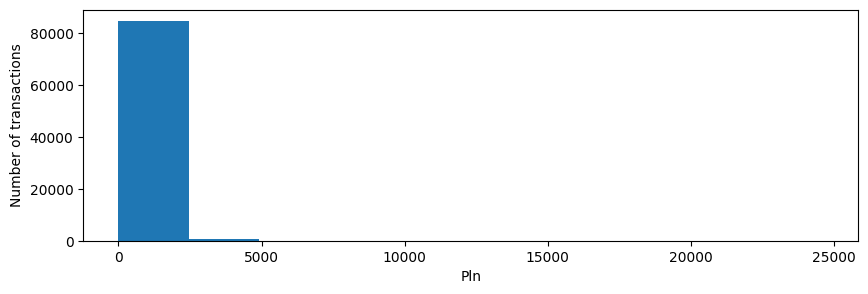

In [37]:
ax = revenue['revenue'].plot(kind='hist', figsize=(10,3))
ax.set_ylabel('Number of transactions')
ax.set_xlabel('Pln')

In [40]:
revenue['month']=revenue['transaction_day'].dt.month

In [41]:
revenue['year']=revenue['transaction_day'].dt.year

In [42]:
revenue['day']=revenue['transaction_day'].dt.day

In [43]:
revenue['weekday']=revenue['transaction_day'].dt.dayofweek

In [60]:
revenue['day_name']=revenue['transaction_day'].dt.day_name()

In [61]:
revenue.head()

,product_type,payment_method,game_genre,transaction_day,currency,revenue,month,year,day,weekday,day_name
0,Bundle,Bank Transfer,Adventure,2022-07-08,PLN,190.903902,7,2022,8,4,Friday
1,Bundle,Bank Transfer,Puzzle,2022-07-08,PLN,30.080000,7,2022,8,4,Friday
2,Bundle,Bank Transfer,Racing,2022-07-08,PLN,273.400596,7,2022,8,4,Friday
3,DLC,Bank Transfer,Adventure,2022-07-08,PLN,85.790000,7,2022,8,4,Friday
4,DLC,Bank Transfer,Indie,2022-07-08,PLN,22.930000,7,2022,8,4,Friday


In [47]:
corr = revenue.corr(numeric_only=True)
corr

,revenue,month,year,day,weekday
revenue,1.000000,-0.007612,0.005314,0.004175,-0.004963
month,-0.007612,1.000000,-0.451609,0.008956,0.005934
year,0.005314,-0.451609,1.000000,-0.016931,-0.002132
day,0.004175,0.008956,-0.016931,1.000000,-0.002683
weekday,-0.004963,0.005934,-0.002132,-0.002683,1.000000


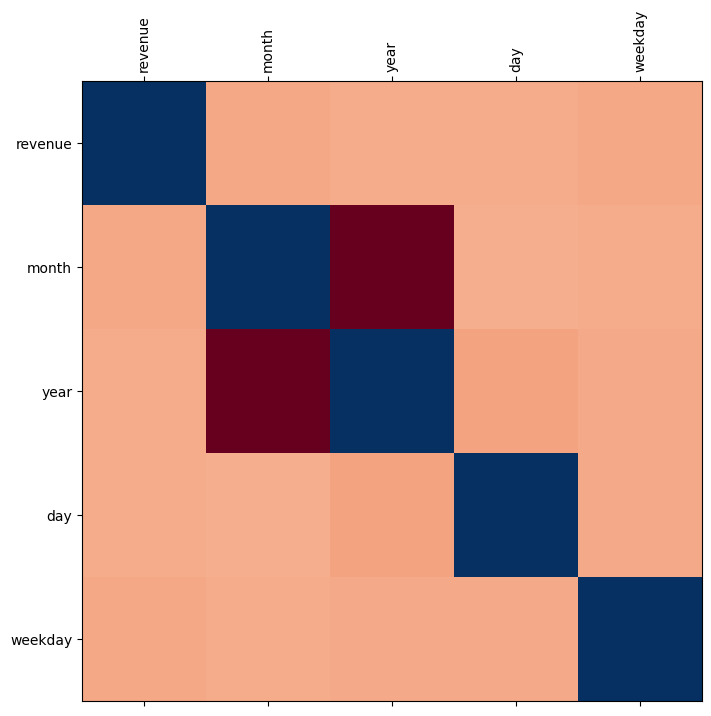

In [48]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

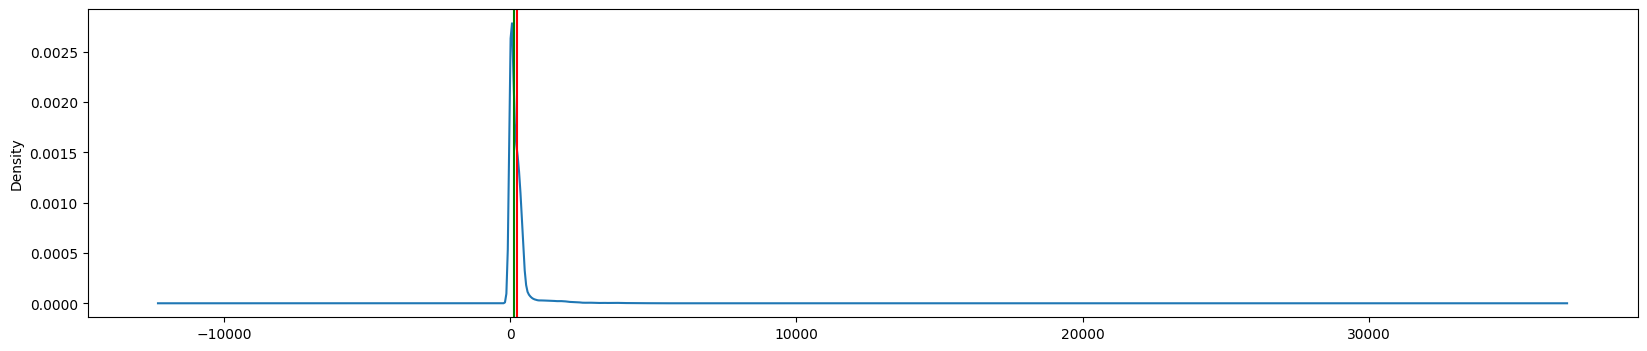

In [51]:
ax = revenue['revenue'].plot(kind='density', figsize=(20,4)) # kde
ax.axvline(revenue['revenue'].mean(), color='red')
ax.axvline(revenue['revenue'].median(), color='green')

<Axes: ylabel='count'>

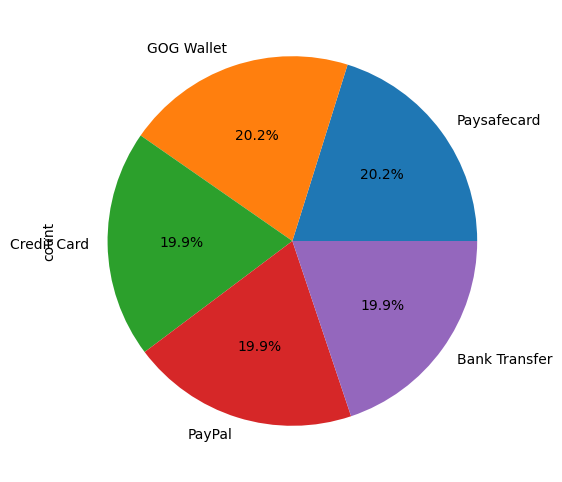

In [54]:
revenue['payment_method'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))

<Axes: ylabel='count'>

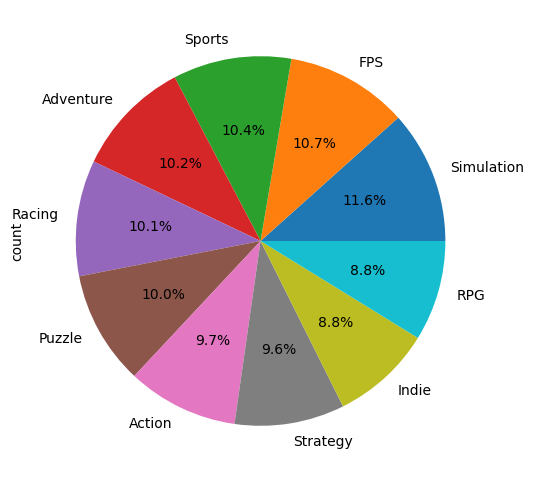

In [55]:
revenue['game_genre'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))

<Axes: ylabel='count'>

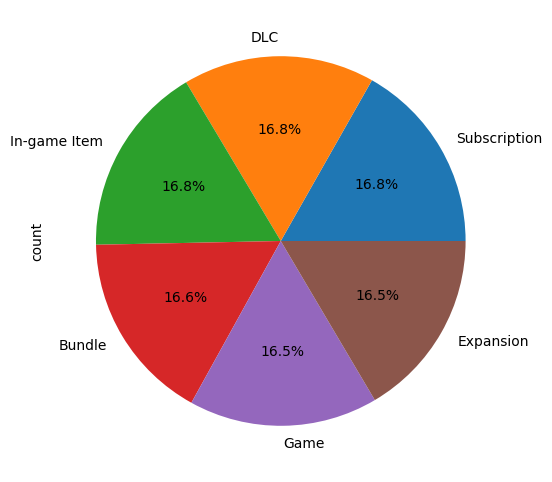

In [56]:
revenue['product_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))

<Axes: ylabel='count'>

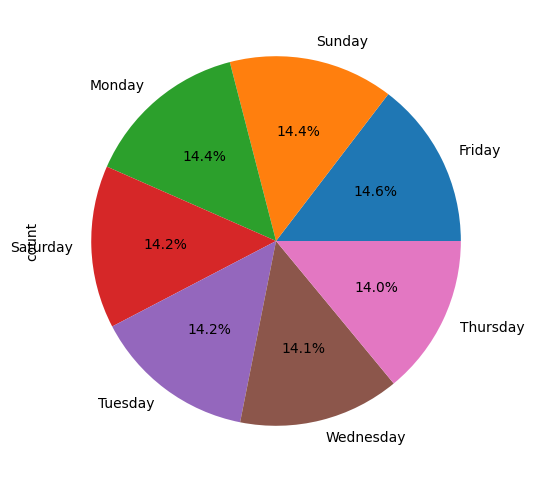

In [62]:
revenue['day_name'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))

In [63]:
revenue_month = revenue[['month','revenue']].copy()
revenue_month.head()

,month,revenue
0,7,190.903902
1,7,30.080000
2,7,273.400596
3,7,85.790000
4,7,22.930000


In [64]:
revenue_month.groupby("month").sum()

,revenue
month,
1,1.802053e+06
2,1.737003e+06
3,1.872774e+06
4,1.836040e+06
5,1.805638e+06
6,1.674453e+06
7,1.713519e+06
8,1.863634e+06
9,1.707434e+06


In [65]:
import calendar

In [66]:
revenue_month['mon'] = revenue_month['month'].apply(lambda x: calendar.month_abbr[x])

<Axes: ylabel='count'>

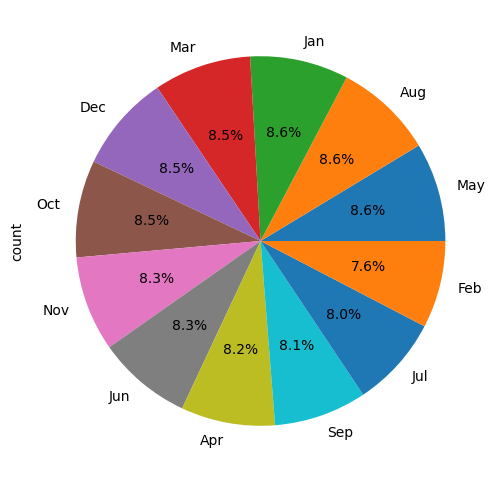

In [67]:
revenue_month['mon'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))

In [138]:
monthly_revenue_payment_method = pd.read_csv('/mnt/hgfs/shared/gog/monthly_revenue_payment_method.csv')

In [139]:
monthly_revenue_payment_method.set_index('mon', inplace=True)

In [140]:
monthly_revenue_payment_method.head()

,dt,CreditCard,GOGWallet,PayPal,BankTransfer,Paysafecard,ttl
mon,,,,,,,
"2022, July",2022-07-01,90106.42,88438.88,96299.45,108931.39,88931.81,472707.95
"2022, August",2022-08-01,114278.27,122405.54,140189.85,130438.93,139633.86,646946.45
"2022, September",2022-09-01,115880.66,93735.53,105514.08,104495.23,99359.14,518984.64
"2022, October",2022-10-01,150363.37,140082.02,135877.34,108036.80,142649.41,677008.94
"2022, November",2022-11-01,95662.95,101377.57,95417.52,134483.21,104581.13,531522.38


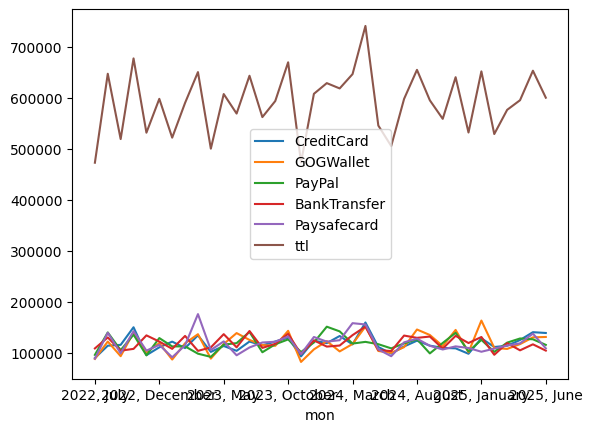

In [141]:
payment_method_trends = monthly_revenue_payment_method.plot.line()

In [130]:
monthly_revenue_payment_method2 = pd.read_csv('/mnt/hgfs/shared/gog/monthly_revenue_payment_method2.csv',parse_dates=['dt'])

In [131]:
monthly_revenue_payment_method2.head()

,mon,dt,CreditCard,GOGWallet,PayPal,BankTransfer,Paysafecard,ttl
0,"2022, July",2022-07-01,90106.42,88438.88,96299.45,108931.39,88931.81,472707.95
1,"2022, August",2022-08-01,114278.27,122405.54,140189.85,130438.93,139633.86,646946.45
2,"2022, September",2022-09-01,115880.66,93735.53,105514.08,104495.23,99359.14,518984.64
3,"2022, October",2022-10-01,150363.37,140082.02,135877.34,108036.80,142649.41,677008.94
4,"2022, November",2022-11-01,95662.95,101377.57,95417.52,134483.21,104581.13,531522.38


In [132]:
monthly_revenue_payment_method_2024 = monthly_revenue_payment_method2[monthly_revenue_payment_method2['dt'] >= '2024-01-01'].copy()

In [133]:
monthly_revenue_payment_method_2024['timestamp']=monthly_revenue_payment_method_2024['dt'].apply(lambda x: (x - datetime(1900, 1, 1)).total_seconds() )

In [134]:
monthly_revenue_payment_method_2024.head()

,mon,dt,CreditCard,GOGWallet,PayPal,BankTransfer,Paysafecard,ttl,timestamp
18,"2024, January",2024-01-01,119240.84,123221.96,151477.56,112515.44,122168.55,628624.35,3.913056e+09
19,"2024, February",2024-02-01,133249.67,103052.07,142308.27,114595.22,125028.33,618233.56,3.915734e+09
20,"2024, March",2024-03-01,116835.66,117633.31,118462.97,134972.05,158383.24,646287.23,3.918240e+09
21,"2024, April",2024-04-01,159723.53,151728.52,121752.22,151625.31,155848.91,740678.49,3.920918e+09
22,"2024, May",2024-05-01,111742.43,103934.91,117188.36,105647.75,107000.06,545513.51,3.923510e+09


In [135]:
monthly_revenue_payment_method_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 18 to 35
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   mon           18 non-null     object        
 1   dt            18 non-null     datetime64[ns]
 2   CreditCard    18 non-null     float64       
 3   GOGWallet     18 non-null     float64       
 4   PayPal        18 non-null     float64       
 5   BankTransfer  18 non-null     float64       
 6   Paysafecard   18 non-null     float64       
 7   ttl           18 non-null     float64       
 8   timestamp     18 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 1.4+ KB


In [126]:
monthly_revenue_payment_method_2024.describe()

,dt,CreditCard,GOGWallet,PayPal,BankTransfer,Paysafecard,ttl,timestamp
count,18,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,1.800000e+01
mean,2024-09-15 14:40:00,120451.343333,122956.202222,121443.712222,119695.332778,119214.513333,603761.103889,3.935400e+09
min,2024-01-01 00:00:00,98460.810000,100217.540000,99176.310000,96472.560000,93670.230000,505392.110000,3.913056e+09
25%,2024-05-08 18:00:00,111695.645000,108456.787500,116173.400000,106393.305000,108679.430000,563045.602500,3.924180e+09
50%,2024-09-16 00:00:00,115582.430000,117492.580000,119947.620000,118114.650000,114321.550000,598905.360000,3.935434e+09
75%,2025-01-24 06:00:00,127897.527500,134247.622500,126849.897500,131952.545000,124313.385000,644773.977500,3.946687e+09
max,2025-06-01 00:00:00,159723.530000,163501.880000,151477.560000,151625.310000,158383.240000,740678.490000,3.957725e+09
std,NaN,15473.674501,19080.728149,13776.454364,14711.034803,17113.955765,57828.794981,1.403706e+07


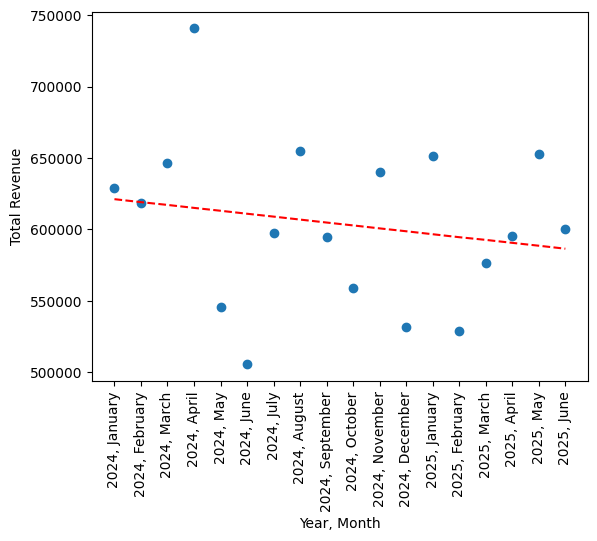

In [136]:
x1 = monthly_revenue_payment_method_2024['timestamp']
x = monthly_revenue_payment_method_2024['mon']
y = monthly_revenue_payment_method_2024['ttl']
plt.scatter(x, y)
plt.xlabel('Year, Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
z = np.polyfit(x1,y,1)
p = np.poly1d(z)
plt.plot(x,p(x1),"r--")
plt.show()
